In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")
from sklearn.metrics import r2_score
import diversity_tools as dt

In [4]:
selected_cbg_brand = pd.read_csv('selected_cbg_brand.csv', index_col = 'cbg')
selected_cbg_stats = pd.read_csv('selected_cbg_stats.csv', index_col = 'cbg')
selected_brands = pd.read_csv('selected_brands.csv')
brand_cat = pd.read_csv('brand_cat.csv')
brand_median = pd.read_csv('brand_median.csv')
yelp_labelled = pd.read_csv('yelp_labelled.csv')
selected_cbg_income = selected_cbg_stats[['income']]

In [5]:
cbg_diversity = dt.get_diversity(selected_cbg_brand)
# cbg_diversity.to_csv('cbg_diversity.csv')


In [6]:
income_diversity = selected_cbg_income.merge(cbg_diversity, left_index = True, right_index = True)

In [ ]:
dt.corr_table(income_diversity)
# dt.corr_table(income_diversity).to_excel('Appendix/TableA2_income_diversity_corr.xlsx')

,income,nbrands,entropy_brand,brand_range,brand_std,nlevels,entropy_price
income,1.0***,0.288***,0.292***,0.365***,0.471***,0.296***,0.358***
nbrands,0.288***,1.0***,0.918***,0.507***,0.321***,0.459***,0.262***
entropy_brand,0.292***,0.918***,1.0***,0.543***,0.398***,0.493***,0.369***
brand_range,0.365***,0.507***,0.543***,1.0***,0.809***,0.398***,0.409***
brand_std,0.471***,0.321***,0.398***,0.809***,1.0***,0.363***,0.466***
nlevels,0.296***,0.459***,0.493***,0.398***,0.363***,1.0***,0.742***
entropy_price,0.358***,0.262***,0.369***,0.409***,0.466***,0.742***,1.0***


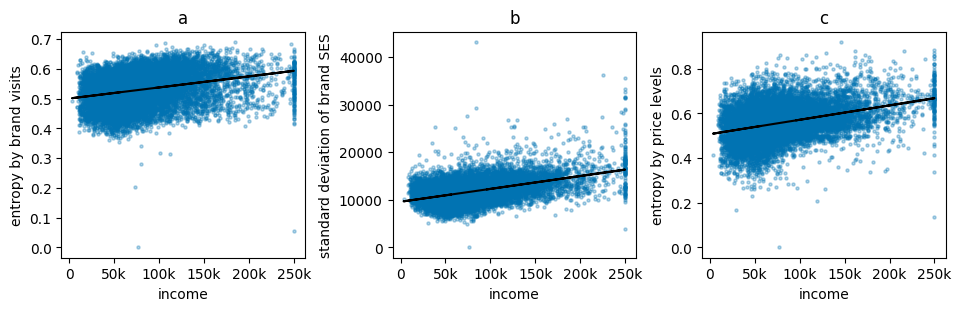

In [ ]:
dt.plot_income_diversity(income_diversity)
# plt.savefig('Figures/Figure4.png', dpi = 300)


# by industry (naics 3 digits)

## get dataframe selected_brand_cat3d
it has the brands, their naics 3 digits and category names 

the names are paired from https://www.census.gov/naics/?input=453&year=2017

In [11]:
selected_brand_cat = brand_cat[brand_cat['brands'].isin(selected_brands['brands'])].reset_index(drop = True)
naics4 = selected_brand_cat['naics_code'].astype(str).str.slice(0,4)
naics3 = selected_brand_cat['naics_code'].astype(str).str.slice(0,3)
selected_brand_cat = selected_brand_cat.assign(naics4 = naics4, naics3 = naics3)

In [12]:
selected_brand_cat.groupby('naics3').size().reset_index().sort_values(by = 0, ascending = False)

,naics3,0
10,722,297
3,448,203
0,445,95
9,713,89
4,451,53
6,453,49
1,446,47
5,452,42
2,447,35
7,512,9


In [13]:
# get the industry names from https://www.census.gov/naics/?input=453&year=2017
naics3_dic = {"722": "Food Services and Drinking Places",
              "448": "Clothing and Clothing Accessories Stores",
              "445": "Food and Beverage Stores",
              "713": "Amusement, Gambling, and Recreation Industries",
              "451": "Sporting Goods, Hobby, Musical Instrument, and Book Stores",
              "453": "Miscellaneous Store Retailers",
              "446": "Health and Personal Care Stores",
              "452": "General Merchandise Stores",
              '447': "Gasoline Stations",
              '512': "Motion Picture and Video Industries",
              '812': "Personal and Laundry Services",
              '532': "Rental and Leasing Services"}

In [14]:
selected_brand_cat['naics3_category'] = selected_brand_cat['naics3'].map(naics3_dic)

In [15]:
selected_brand_cat3d = selected_brand_cat[['brands', 'naics3', 'naics3_category']]

In [16]:
selected_brand_cat3d

,brands,naics3,naics3_category
0,& Other Stories,448,Clothing and Clothing Accessories Stores
1,&pizza,722,Food Services and Drinking Places
2,1-800-Flowers,453,Miscellaneous Store Retailers
3,10 Spot/MadRag,448,Clothing and Clothing Accessories Stores
4,110 Grill,722,Food Services and Drinking Places
...,...,...,...
919,lululemon athletica,448,Clothing and Clothing Accessories Stores
920,maurices,448,Clothing and Clothing Accessories Stores
921,rue21,448,Clothing and Clothing Accessories Stores
922,sweetgreen,722,Food Services and Drinking Places


In [17]:
# selected_brand_cat3d.to_csv('selected_brand_cat3d.csv', index = False)

## get some category stats

In [18]:
# industry brand SES and price level variations
cat_stats = selected_brand_cat3d[['brands', 'naics3_category']].merge(brand_median, on = 'brands')
cat_stats = cat_stats.merge(yelp_labelled, on = 'brands')
cat_stats = cat_stats.set_index('brands').groupby('naics3_category').std()
# number of brands in each industry
cat_stats.insert(0, 'n_brands', selected_brand_cat.groupby('naics3_category').size())
cat_stats = cat_stats.rename(columns = {'median': 'brand_ses_std', 'yelp_dollar': 'price_level_std'})

# round for presentation
cat_stats['brand_ses_std'] = cat_stats['brand_ses_std'].astype(int)
cat_stats['price_level_std'] = cat_stats['price_level_std'].round(3)

In [19]:
cat_stats

,n_brands,brand_ses_std,price_level_std
naics3_category,,,
"Amusement, Gambling, and Recreation Industries",89,19314,1.035
Clothing and Clothing Accessories Stores,203,19654,0.768
Food Services and Drinking Places,297,18584,0.663
Food and Beverage Stores,95,30776,0.640
Gasoline Stations,35,20154,0.512
General Merchandise Stores,42,21078,0.935
Health and Personal Care Stores,47,14221,0.494
Miscellaneous Store Retailers,49,23878,0.598
Motion Picture and Video Industries,9,21571,NaN


## three measures in each cat to report in paper
excluding Personal and Laundry Services(812) and Rental and Leasing Services(532) due to limited number of brands

In [20]:
industries = cat_stats[cat_stats['n_brands'] > 5].index.values

In [21]:
def naics3_matrix(naics3_category):
    """"""
    naics3_brands = selected_brand_cat3d['brands'][selected_brand_cat3d['naics3_category'] == naics3_category]
    matrix = selected_cbg_brand[selected_cbg_brand.columns.intersection(naics3_brands)]
    return matrix

def naics3_diversity(naics3_category):
    """"""
    matrix = naics3_matrix(naics3_category)
    diversity = dt.get_3diversity(matrix)
    return diversity

def naics3_corr_table(cbg_var, variable):
    """"""
    # create an empty dataframe to be filled in 
    columns = ['naics3_category', 'entropy_brand', 'brand_std', 'entropy_price']
    cat_diverstiy = pd.DataFrame(columns = columns)
    significance_levels = [.05, .01, .001]


    for cat in industries:
        # get the diversity measures
        df = naics3_diversity(cat)
        df = df.merge(cbg_var, left_index = True, right_index = True)

        # statistical significance denoted in asterisks
        row = [cat]
        # dealing with one exception 
        measures = ['entropy_brand', 'brand_std'] if cat == "Motion Picture and Video Industries" else ['entropy_brand', 'brand_std', 'entropy_price']
        for measure in measures:
            filtered_df = df.dropna(subset=[measure])
            r, p = stats.pearsonr(filtered_df[variable], filtered_df[measure])
            p_value_sign = ''.join(['*' for t in significance_levels if p <= t])
            value = f"{r.round(3)}{p_value_sign}"
            row.append(value)
        if cat ==  "Motion Picture and Video Industries":
            row.append("-")

        cat_diverstiy.loc[len(cat_diverstiy)] = row
    
    cat_diverstiy = cat_diverstiy.set_index('naics3_category')
    return cat_diverstiy


In [23]:
cat_income_div = naics3_corr_table(selected_cbg_income, "income")

In [24]:
# merge to report
cat_income_div.columns = pd.MultiIndex.from_product([['Associations with income'], cat_income_div.columns])
cat_stats.columns = pd.MultiIndex.from_product([['Industry characteristics'], cat_stats.columns])

income_div_industry = cat_income_div.merge(cat_stats, left_index = True, right_index = True)
income_div_industry = income_div_industry.sort_values(by = [("Associations with income","entropy_brand")], ascending = False)

In [25]:
income_div_industry

Associations with income  \
                                                              entropy_brand   
naics3_category                                                               
Amusement, Gambling, and Recreation Industries                     0.329***   
Miscellaneous Store Retailers                                      0.271***   
Clothing and Clothing Accessories Stores                           0.239***   
Food Services and Drinking Places                                  0.238***   
Sporting Goods, Hobby, Musical Instrument, and ...                 0.222***   
Motion Picture and Video Industries                                0.111***   
Gasoline Stations                                                  0.108***   
Health and Personal Care Stores                                    0.103***   
Food and Beverage Stores                                            0.07***   
General Merchandise Stores                                          0.05***   

                                                                            \
                                                   brand_std entropy_price   
naics3_category                                                              
Amusement, Gambling, and Recreation Industries      0.246***      0.153***   
Miscellaneous Store Retailers                       0.216***      0.083***   
Clothing and Clothing Accessories Stores            0.098***      0.232***   
Food Services and Drinking Places                   0.444***      0.404***   
Sporting Goods, Hobby, Musical Instrument, and ...  0.254***      0.042***   
Motion Picture and Video Industries                 0.074***             -   
Gasoline Stations                                     0.022*      0.067***   
Health and Personal Care Stores                     0.167***      0.036***   
Food and Beverage Stores                            0.064***        0.1***   
General Merchandise Stores                           0.13***       0.21***   

                                                   Industry characteristics  \
                                                                   n_brands   
naics3_category                                                               
Amusement, Gambling, and Recreation Industries                           89   
Miscellaneous Store Retailers                                            49   
Clothing and Clothing Accessories Stores                                203   
Food Services and Drinking Places                                       297   
Sporting Goods, Hobby, Musical Instrument, and ...                       53   
Motion Picture and Video Industries                                       9   
Gasoline Stations                                                        35   
Health and Personal Care Stores                                          47   
Food and Beverage Stores                                                 95   
General Merchandise Stores                                               42   

                                                                  \
                                                   brand_ses_std   
naics3_category                                                    
Amusement, Gambling, and Recreation Industries             19314   
Miscellaneous Store Retailers                              23878   
Clothing and Clothing Accessories Stores                   19654   
Food Services and Drinking Places                          18584   
Sporting Goods, Hobby, Musical Instrument, and ...         25145   
Motion Picture and Video Industries                        21571   
Gasoline Stations                                          20154   
Health and Personal Care Stores                            14221   
Food and Beverage Stores                                   30776   
General Merchandise Stores                                 21078   

                                                                    
                          

In [ ]:
# income_div_industry.to_excel("Tables/Table1_income_div_industry.xlsx")

# NYC vs other

In [ ]:
cbg_fips_codes = pd.read_csv('../SafeGraph_data/safegraph_open_census_data_2019/metadata/cbg_fips_codes.csv')

In [43]:
codes = cbg_fips_codes[cbg_fips_codes['state'] == 'NY']
codes['state_fips'].unique()

array([36])

In [44]:
codes[codes['county'].isin(['New York County', 'Kings County', 'Bronx County',
                           'Richmond County', 'Queens County'])]

,state,state_fips,county_fips,county,class_code
1830,NY,36,5,Bronx County,H6
1851,NY,36,47,Kings County,H6
1858,NY,36,61,New York County,H6
1868,NY,36,81,Queens County,H6
1870,NY,36,85,Richmond County,H6


## get different matrices

In [27]:
NYC_codes = ('36005', '36047', '36061', '36081', '36085')
NYC_cbg = selected_cbg_brand.index[selected_cbg_brand.index.astype(str).str.startswith(NYC_codes)].values
# nyc cbg to all poi
nyc_all = selected_cbg_brand[selected_cbg_brand.index.isin(NYC_cbg)]
# non-nyc cbg to all poi
nnyc_all = selected_cbg_brand[~selected_cbg_brand.index.isin(NYC_cbg)]

In [28]:
# get the poi in NYC or not
def unpack_to_matrix(unpack):
    """"""
    matrix = unpack.drop(['placekey', 'city'], axis = 1)
    matrix = matrix.groupby(['visitor_home_cbgs', 'brands']).sum().unstack()
    matrix = matrix.fillna(0)
    matrix.columns = matrix.columns.droplevel(0)
    matrix.index.name = 'cbg'
    matrix.index = matrix.index.astype(int)
    
    return matrix

def get_all2_matrices():
    """"""
    # get poi city data
    NY_brands = pd.read_csv('NY_brands.csv')
    cbg_unpack = pd.read_csv('cbg_unpack.csv')
    POI_city = NY_brands[['placekey', 'city']]
    # merge city with unpack data (poi-cbg pairs)
    unpack_city = pd.merge(cbg_unpack, POI_city, on = 'placekey')
    # select brands and cbgs in our sample
    unpack_city = unpack_city[unpack_city['brands'].isin(selected_brands['brands'])]
    unpack_city = unpack_city[unpack_city['visitor_home_cbgs'].isin(selected_cbg_brand.index.values)]
    # select poi-brand pair based on NYC or not
    NYC_unpack = unpack_city[unpack_city['city'] == "New York"]
    nNYC_unpack = unpack_city[unpack_city['city'] != "New York"]
    # get the matrices
    all_nyc = unpack_to_matrix(NYC_unpack)
    all_nnyc = unpack_to_matrix(nNYC_unpack)
    return all_nyc, all_nnyc

In [29]:
all_nyc, all_nnyc = get_all2_matrices()

In [30]:
# nyc to nyc
nyc_nyc = all_nyc[all_nyc.index.isin(NYC_cbg)]
# nnyc to nnyc
nnyc_nnyc = all_nnyc[~all_nnyc.index.isin(NYC_cbg)]

## get diversity measures

In [31]:
def nyc_corr_table(cbg_var, variable):

    matrices = [nyc_all, nyc_nyc, nnyc_all, nnyc_nnyc]

    # create an empty dataframe to be filled in 
    measures = ['entropy_brand', 'brand_std', 'entropy_price']
    nyc_div_report = pd.DataFrame(columns = measures)
    significance_levels = [.05, .01, .001]

    for matrix in matrices:
        df = dt.get_3diversity(matrix)
        df = df.merge(cbg_var, left_index = True, right_index = True)
        row = []
        for measure in measures:
            filtered_df = df.dropna(subset=[measure])
            r, p = stats.pearsonr(filtered_df[variable], filtered_df[measure])
            p_value_sign = ''.join(['*' for t in significance_levels if p <= t])
            value = f"{r.round(3)}{p_value_sign}"
            row.append(value)
        
        nyc_div_report.loc[len(nyc_div_report)] = row

    # set index values
    nyc_div_report.index = ["nyc_all", "nyc_nyc", "nnyc_all", "nnyc_nnyc"]
    return nyc_div_report

In [32]:
nyc_div_income = nyc_corr_table(selected_cbg_income, "income")

In [33]:
nyc_div_income.columns = pd.MultiIndex.from_product([['Associations with income'], nyc_div_income.columns])

In [34]:
nyc_div_income

Associations with income                        
                     entropy_brand brand_std entropy_price
nyc_all                   -0.038**  0.134***      0.202***
nyc_nyc                   0.122***     0.023       0.041**
nnyc_all                  0.468***  0.602***       0.53***
nnyc_nnyc                  0.37***  0.599***      0.506***

In [35]:
nyc_div_income.to_excel("Tables/Table2_nyc_div_income.xlsx")